<a href="https://colab.research.google.com/github/jamespan1118/Xenopus_signal_processing/blob/main/Wave_Envelope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import librosa
from librosa import display
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import signal
from scipy.io.wavfile import write
import pywt
import seaborn as sns

In [1]:
#checking runtime info
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Jul  2 22:49:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#checking RAM
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [5]:
#loading the file
file_path = "/content/01-F818D-F8387-220616_0456_8min_selection (1)_female.wav"
samples, sampling_rate = librosa.load(file_path,sr=44100)

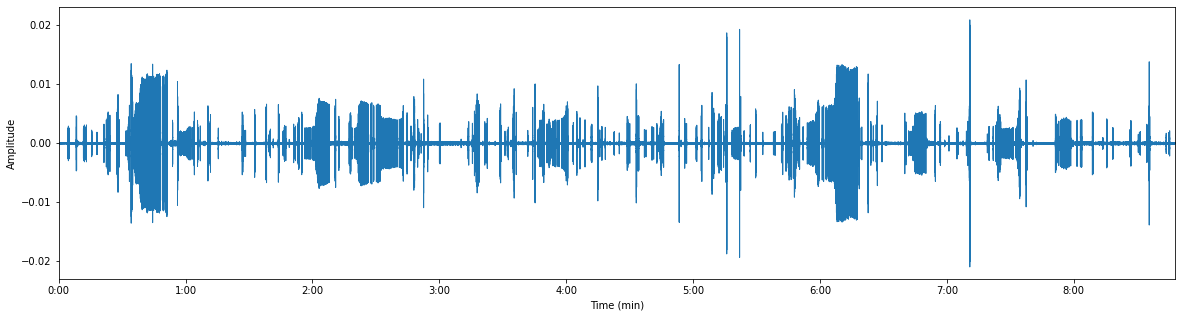

In [6]:
#plotting the audio data in time domain
plt.figure(figsize=(20,5))
librosa.display.waveplot(y=samples,sr=sampling_rate)
plt.xlabel("Time (min)")
plt.ylabel("Amplitude")
plt.show()

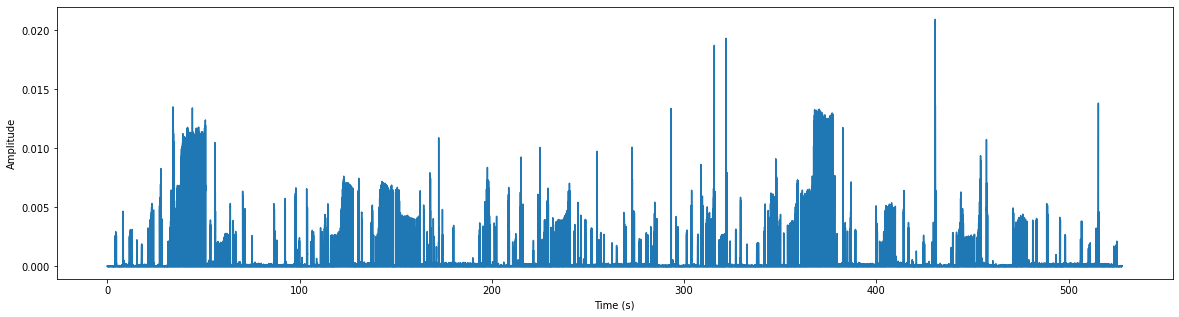

In [7]:
#getting all sample values into their absolute value
samples_abs = abs(samples)
plt.figure(figsize=(20,5))
duration = len(samples)/sampling_rate
time = np.arange(0,duration,1/sampling_rate) #time vector
plt.plot(time,samples_abs)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [8]:
# hilbert transfrom envelope on raw data
hilbert_signal = abs(signal.hilbert(samples))

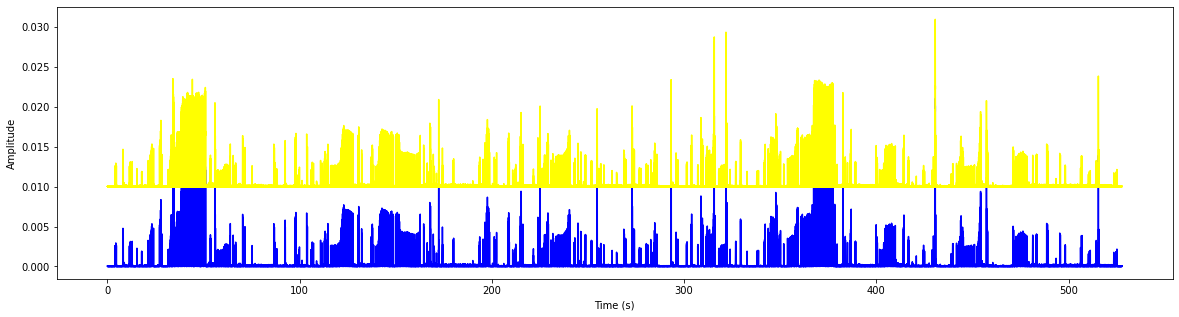

In [9]:
plt.figure(figsize=(20,5))
plt.plot(time,hilbert_signal,color = "blue")
plt.plot(time,samples_abs+0.01,color = "yellow")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [10]:
#find peaks using hilbert signal
#assumption: peaks of calling are at least 0.025 seconds apart
peaks, _  = scipy.signal.find_peaks(hilbert_signal,height=0.001,distance=0.025*44100)

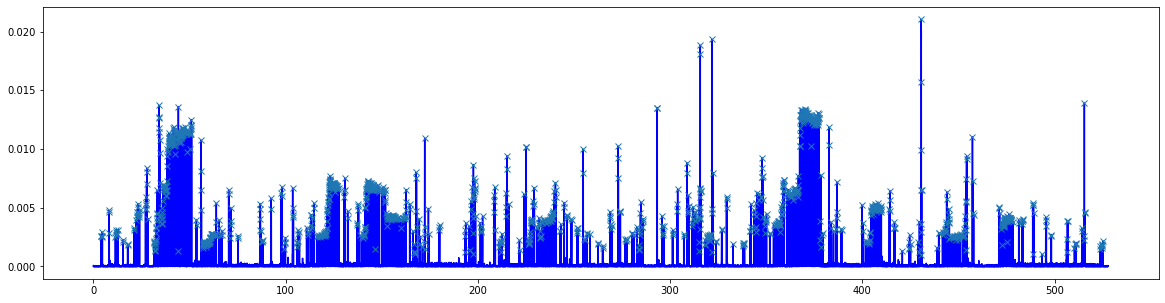

In [12]:
plt.figure(figsize=(20,5))
plt.plot(time,hilbert_signal,color = "blue")
plt.plot(time[peaks],hilbert_signal[peaks],'x')
#plt.xlim(4,5)
plt.show()

In [24]:
len(IPI)

1223

In [15]:
#calculate inter-pulse interval
IPI = []
for i in range(0,len(peaks)-1):
  front = peaks[i]
  back = peaks[i+1]
  difference = time[back] - time[front]
  IPI.append(difference)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


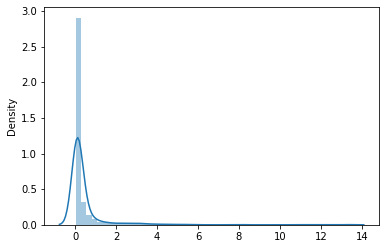

In [25]:
sns.distplot(IPI)

In [ ]:
# generate envelope using continous wavelet transform
coef_list =[]
freq_list=[]
for i in range(94,95):
#i=100
  scale = [1]
  coef, freqs=pywt.cwt(samples,scale,'morl')
  coef_list.append(coef)
  freq_list.append(freqs)

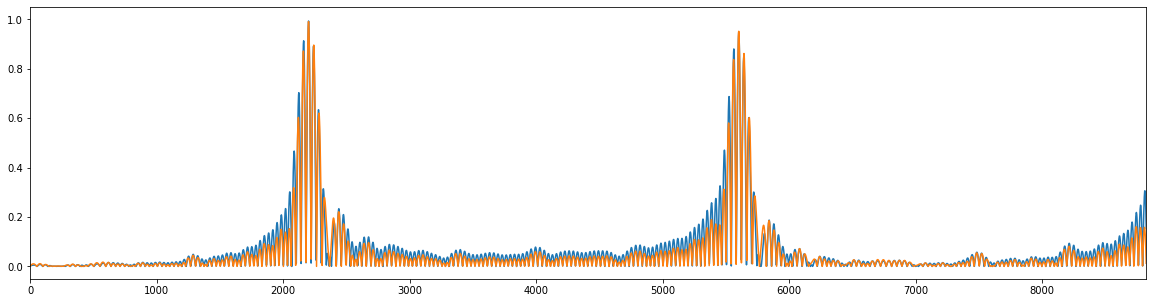

In [ ]:
lbd = int(40*44100)
ubd = int(41*44100)
#first_coef = coef_list[0]
for i in np.arange(0, len(coef_list)):
  plt.figure(figsize=(20,5))
  plt.plot(np.abs(coef_list[i][0][lbd:ubd])/max(np.abs(coef_list[i][0][lbd:ubd])))
  plt.xlim(0,44100*0.2)
  plt.plot(samples_abs[lbd:ubd]/max(samples_abs[lbd:ubd]))
  plt.show()

In [ ]:
# generate envelope using continous wavelet transform
coef_list =[]
freq_list=[]
for i in range(1,9):
  scale = [1]
  coef, freqs=pywt.cwt(samples,scale,'morl')
  coef_list.append(coef)
  freq_list.append(freqs)

In [ ]:
coef, freqs=pywt.cwt(samples,94,'morl')


In [ ]:
a=np.abs(coef.mean(axis=0))
a=a**2
a=a/np.mean(a)
b = a[0::20]

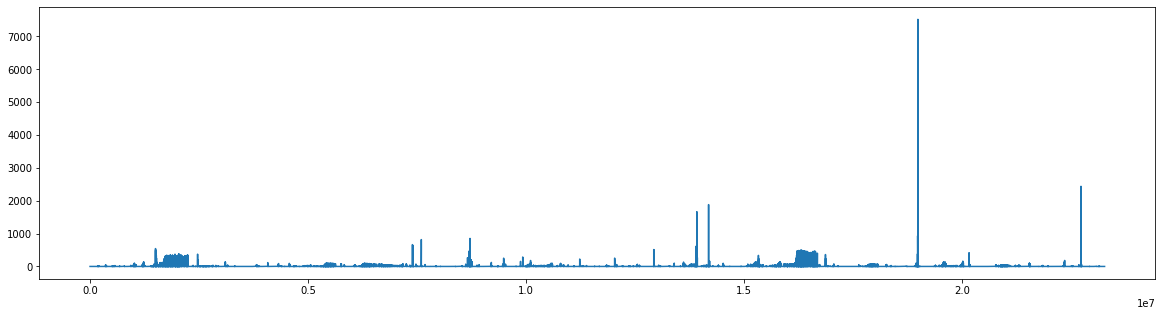

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(a)
#plt.axhline()
#plt.xlim(0,44100*0.2)
#plt.plot(samples_abs[lbd:ubd]/max(samples_abs[lbd:ubd]))
plt.show()

In [ ]:
from scipy.ndimage import gaussian_filter1d
y_smoothed = gaussian_filter1d(a, 1)

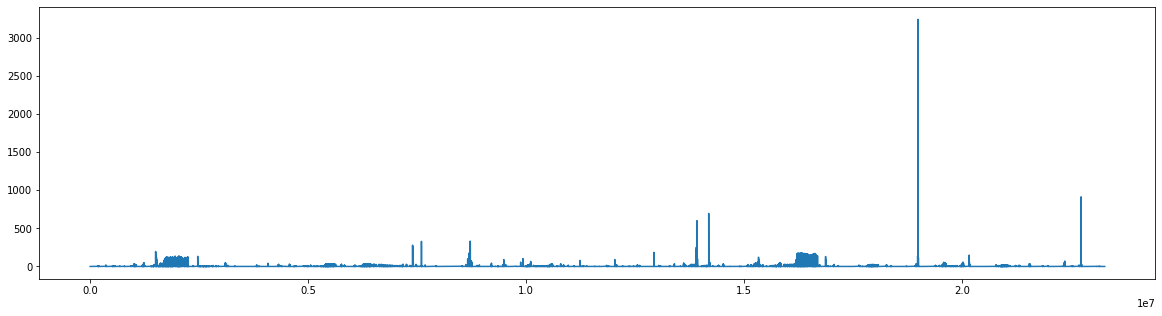

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(y_smoothed)
plt.show()

In [ ]:
from scipy import signal

peaks,_ = signal.find_peaks(y_smoothed, height = 10)

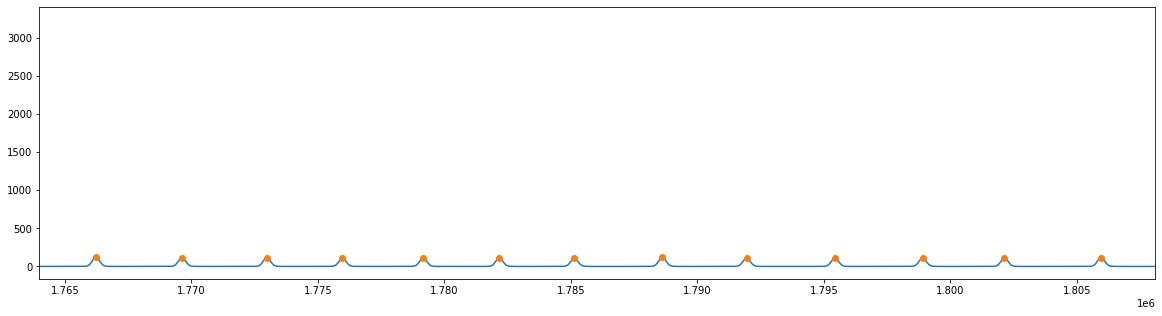

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(y_smoothed)
plt.plot(peaks, y_smoothed[peaks], 'o')
plt.xlim(40*44100, 41*44100)
plt.show()

In [ ]:
100/44100

0.0022675736961451248